In [1]:
import os
import sys
import pprint
import inspect
# Get current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from modelFunc import setAndTestPlotModel, setAndTestPlotModel_with_extra_input, setAndTestModelByDate
# model
from ModelArchitecture.ConvNeXtTinyModel import ConvNeXtTinyWheatModelWithConfidence
from ModelArchitecture.RepVGGA1Model import RepVGGA1WheatModelWithConfidence
from ModelArchitecture.RepVGGB1g4Model import RepVGGB1g4Model
from ModelArchitecture.EfficientNetV2SAddextrainputModel import EfficientNetV2SConfidenceAddoneextrainput
from ModelArchitecture.DenseNetAddextrainputModel import DenseNetConfidenceAddoneextrainput
from ModelArchitecture.RepVGGA1AddextrainputModel import RepVGGA1ConfidenceAddoneextrainput
from ModelArchitecture.DenseNetModel import DenseNet121WheatModel
from ModelArchitecture.EfficientNetV2Model import EfficientNetV2SWheatCountWithConfidence
from ModelArchitecture.EfficientNetV2MModel import EfficientNetV2MWheatModelWithConfidence
from ModelArchitecture.RegNetY8GFModel import RegNetY8GFModel
from ModelArchitecture.EfficientNetV2MAddextrainputModel import EfficientNetV2MConfidenceAddeonextrainput
from ModelArchitecture.RegNetY8GFAddextrainputModel import RegNetY8GFConfidenceAddoneextrainput
from ModelArchitecture.MobileViTV2Model import MobileViTV2WheatModel
from ModelArchitecture.RegNetY8GFAddextrainputModel import RegNetYConfidenceAdd2Inputs
from ModelArchitecture.EfficientNetV2MAddextrainputModel import EfficientNetV2MConfidenceAdd2Inputs
from ModelArchitecture.EfficientNetV2SAddextrainputModel import EfficientNetV2SConfidenceAdd2Inputs
from ModelArchitecture.RepVGGA1AddextrainputModel import RepVGGA1ConfidenceAdd2Inputs
from ModelArchitecture.DenseNetAddextrainputModel import DenseNetConfidenceAdd2Inputs


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_imported_class_dict():
    current_module = sys.modules[__name__]
    return {
        name: obj
        for name, obj in globals().items()
        if inspect.isclass(obj) and obj.__module__ != current_module.__name__
    }
modelDict = get_imported_class_dict()

modelPath:  ./allModel/20StrawWeightAfterDry_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  20StrawWeightAfterDry
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Wei

traitName:  20StrawWeightAfterDry
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:43<00:00,  4.37s/it]



Test Results:
R² Score : 0.5379
MAE      : 2.5770
RMSE     : 3.2497


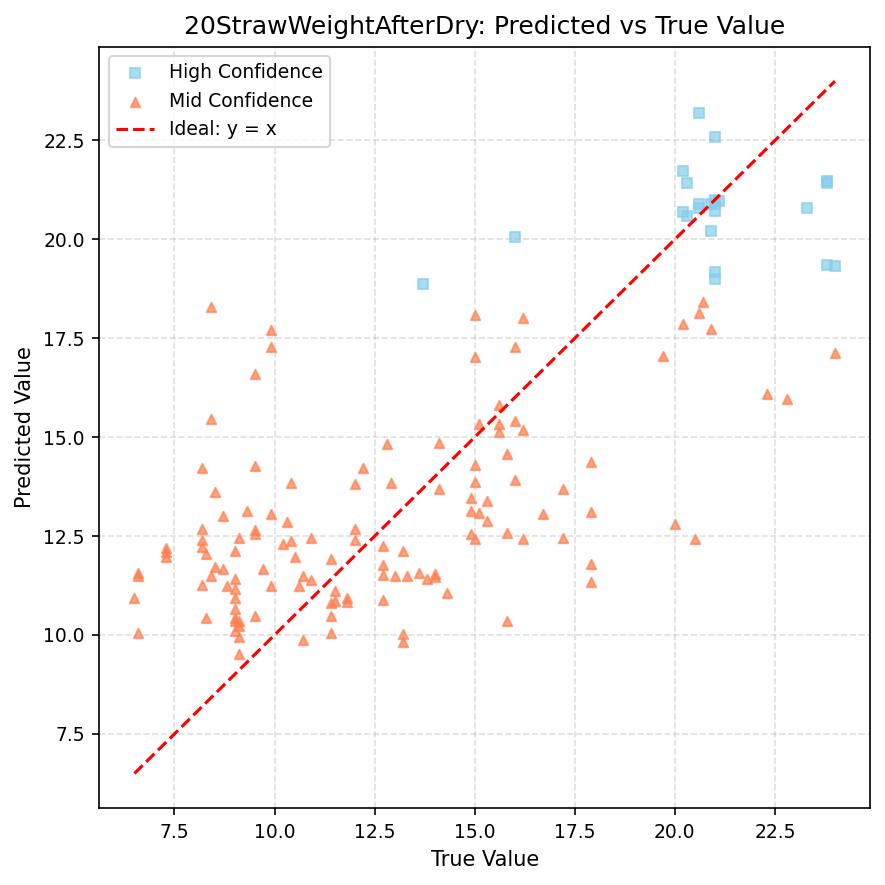

modelPath:  ./allModel/20StrawWeightAfterDry_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  20StrawWeightAfterDry
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  20StrawWeightAfterDry
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:32<00:00,  3.25s/it]



Test Results:
R² Score : 0.5282
MAE      : 2.7276
RMSE     : 3.2837


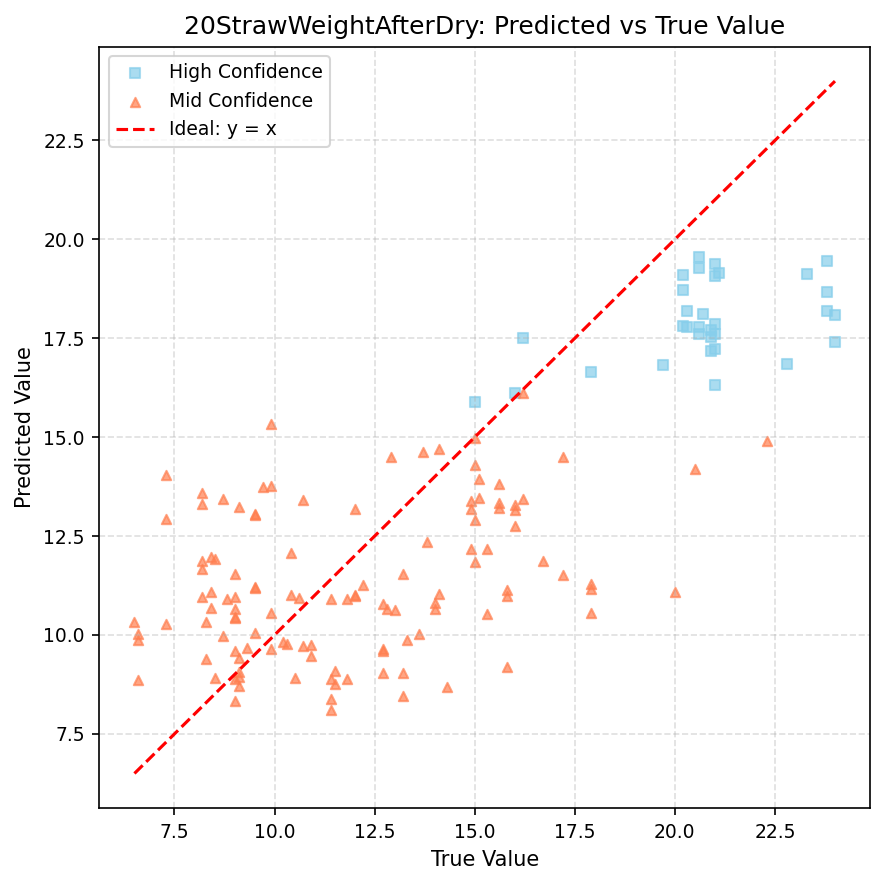

modelPath:  ./allModel/20StrawWeightBeforeDry_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  20StrawWeightBeforeDry
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  20StrawWeightBeforeDry
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:26<00:00,  2.60s/it]



Test Results:
R² Score : 0.5924
MAE      : 2.6241
RMSE     : 3.2703


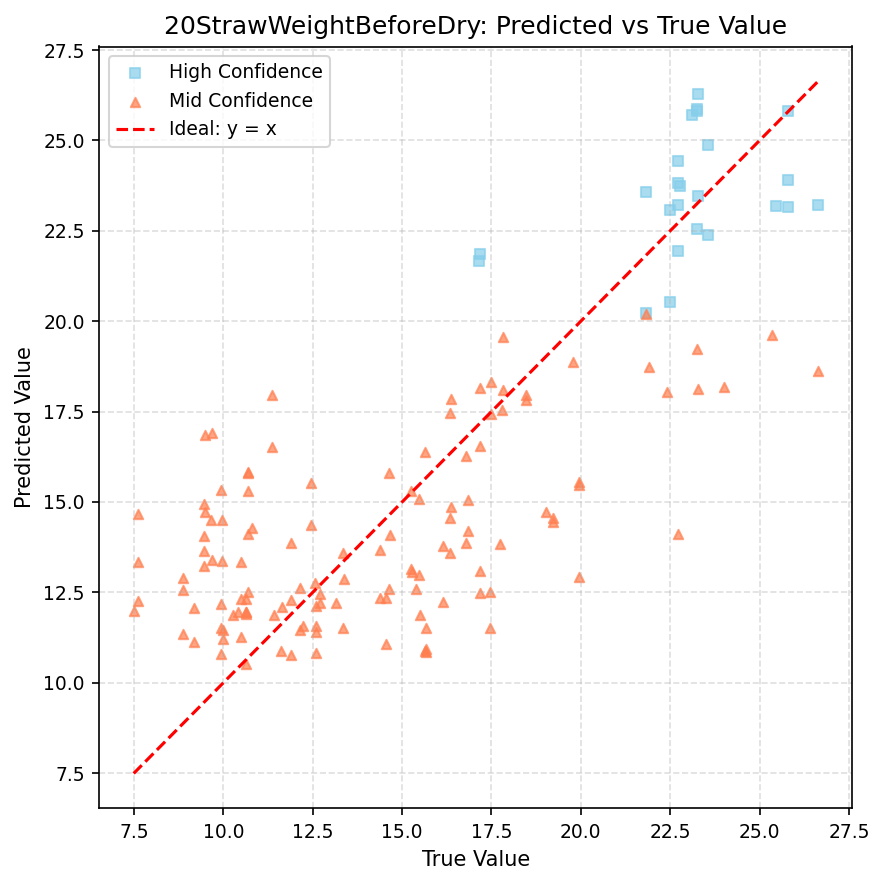

modelPath:  ./allModel/20StrawWeightBeforeDry_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  20StrawWeightBeforeDry
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  20StrawWeightBeforeDry
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:27<00:00,  2.75s/it]



Test Results:
R² Score : 0.4975
MAE      : 2.8065
RMSE     : 3.6309


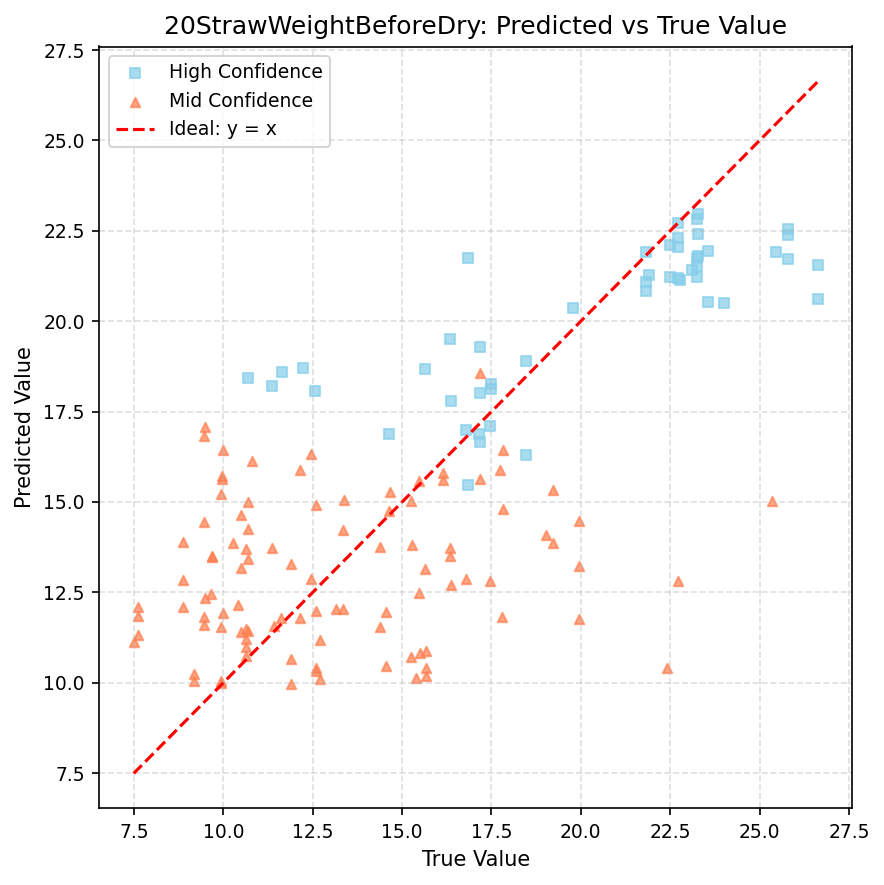

modelPath:  ./allModel/Height_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  Height
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  Height
model:  DenseNet121WheatModel


Testing: 100%|██████████| 9/9 [00:25<00:00,  2.85s/it]



Test Results:
R² Score : 0.8529
MAE      : 3.3808
RMSE     : 4.7859


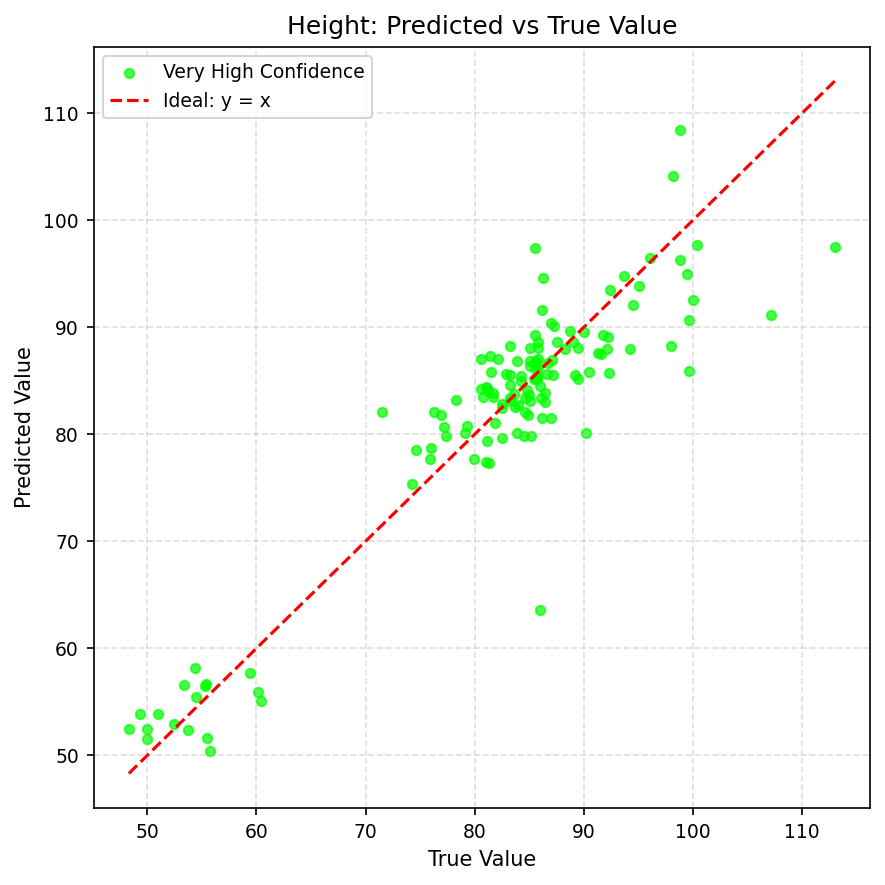

modelPath:  ./allModel/Height_MobileViTV2WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  Height
modelBackbone:  MobileViTV2WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  Height
model:  MobileViTV2WheatModel


Testing: 100%|██████████| 9/9 [00:32<00:00,  3.58s/it]



Test Results:
R² Score : 0.8242
MAE      : 3.8081
RMSE     : 5.2332


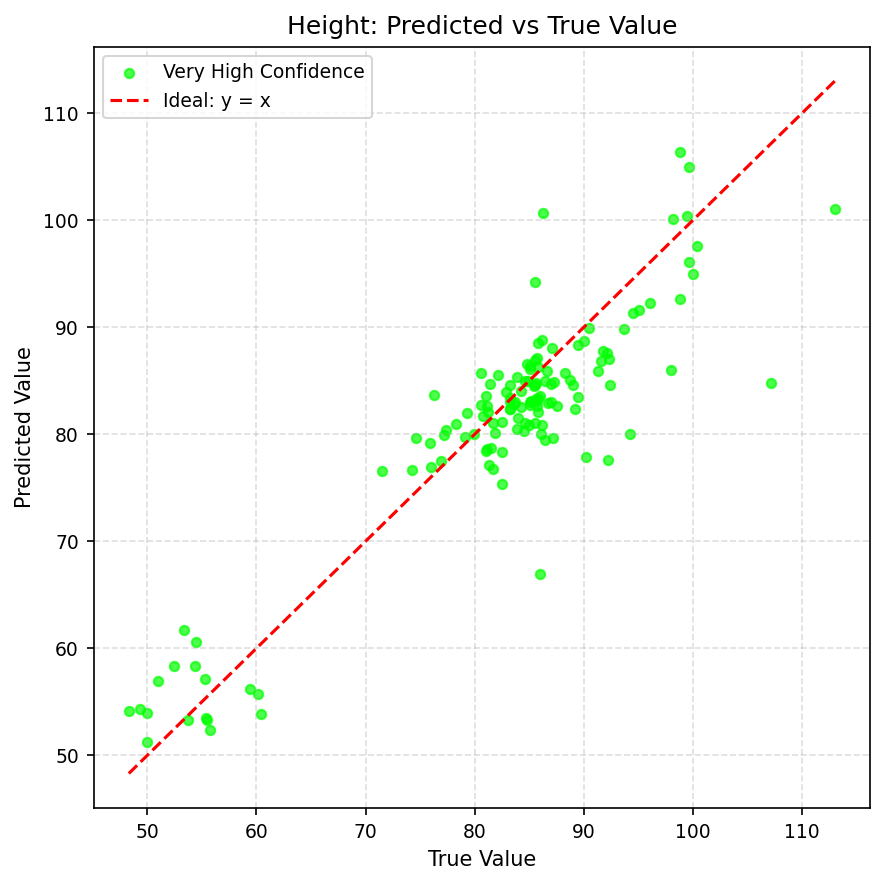

modelPath:  ./allModel/Height_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  Height
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  Height
model:  RegNetY8GFModel


Testing: 100%|██████████| 9/9 [00:27<00:00,  3.08s/it]



Test Results:
R² Score : 0.8606
MAE      : 3.3916
RMSE     : 4.6591


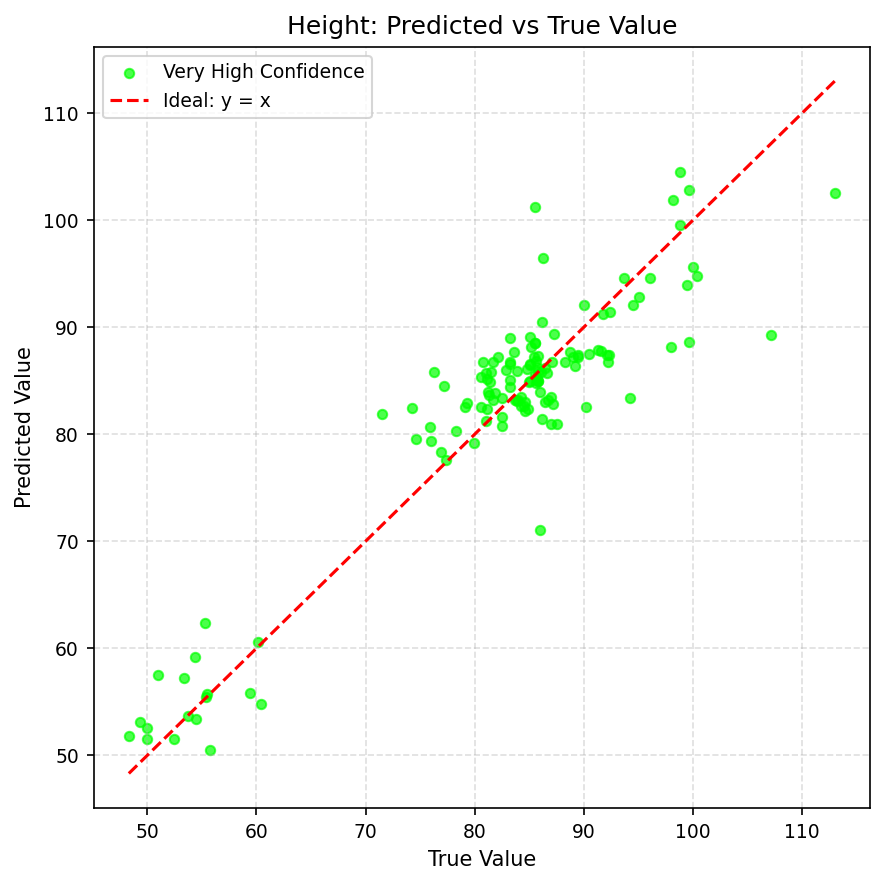

modelPath:  ./allModel/LAI_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  LAI
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  LAI
model:  DenseNet121WheatModel


Testing: 100%|██████████| 9/9 [00:25<00:00,  2.84s/it]



Test Results:
R² Score : 0.3781
MAE      : 0.6737
RMSE     : 0.8945


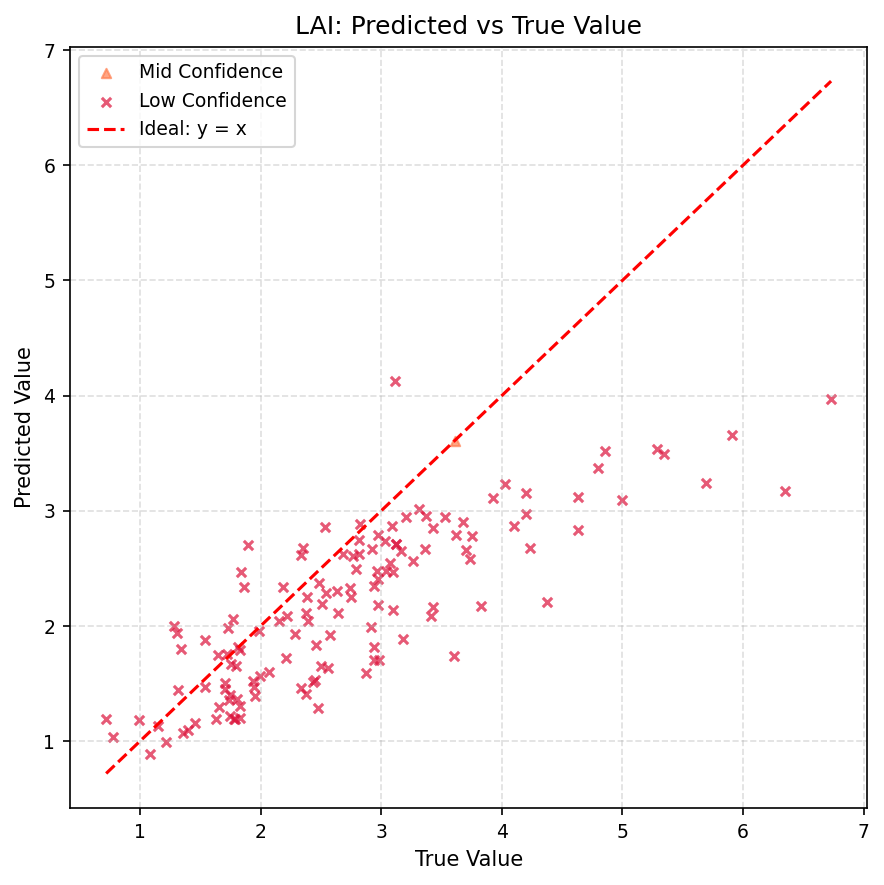

modelPath:  ./allModel/LAI_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  LAI
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  LAI
model:  RegNetY8GFModel


Testing: 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]



Test Results:
R² Score : 0.5077
MAE      : 0.5743
RMSE     : 0.7958


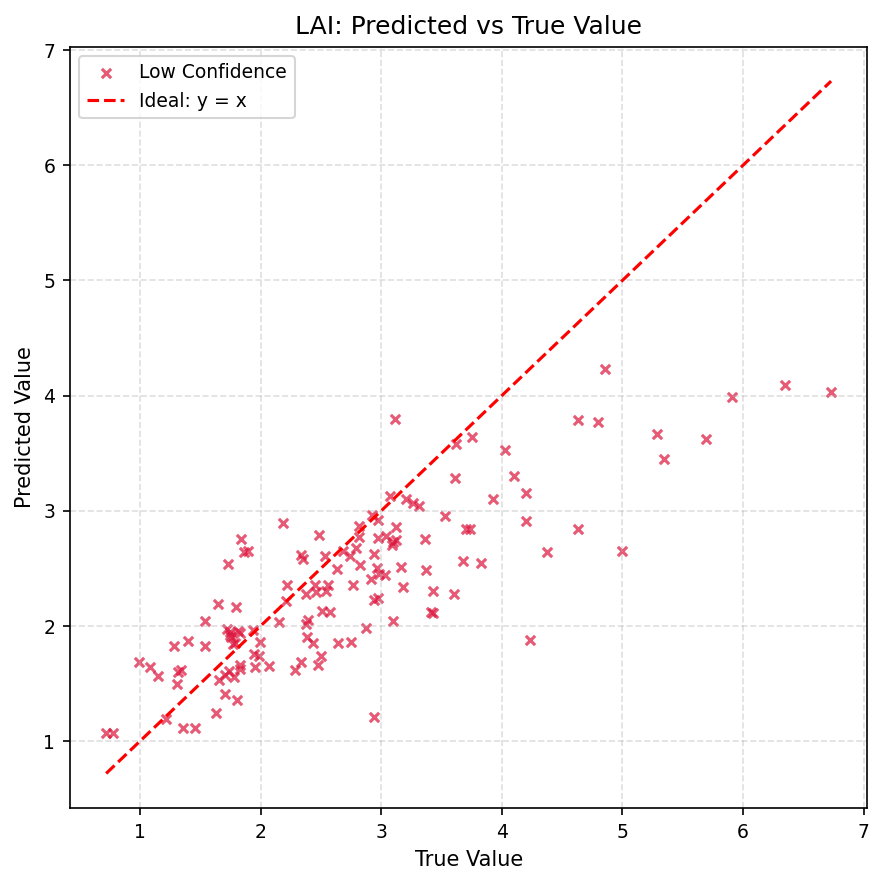

modelPath:  ./allModel/SPAD_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  SPAD
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  SPAD
model:  DenseNet121WheatModel


Testing: 100%|██████████| 9/9 [00:25<00:00,  2.84s/it]



Test Results:
R² Score : 0.7956
MAE      : 3.2111
RMSE     : 4.5244


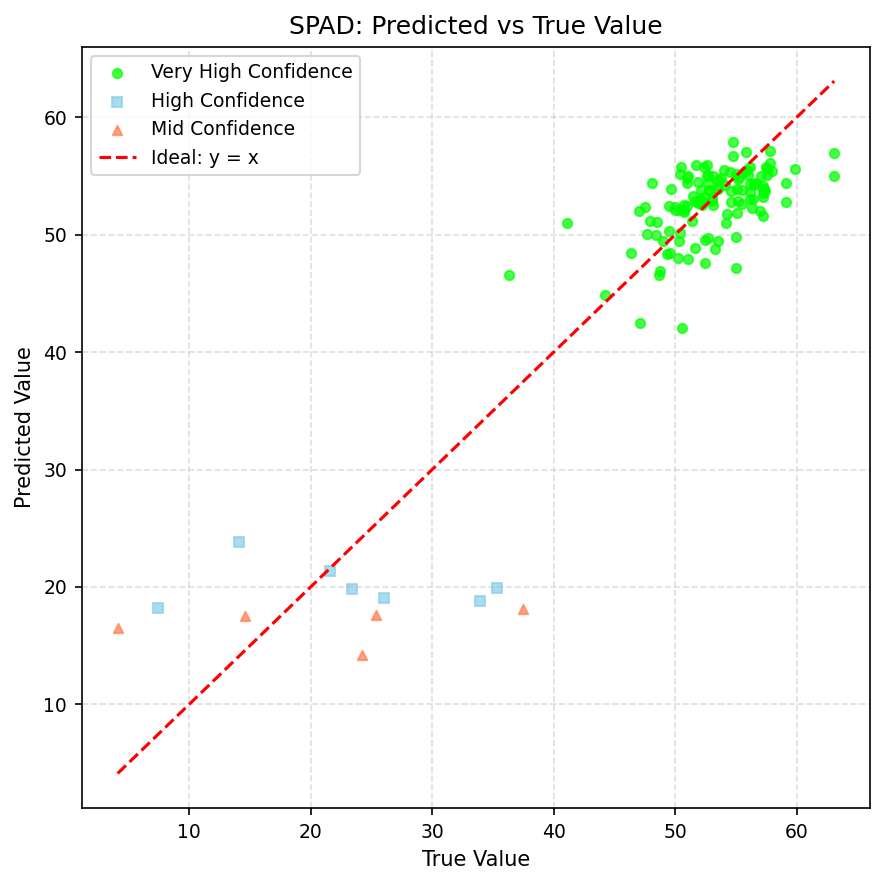

modelPath:  ./allModel/SPAD_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  SPAD
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  SPAD
model:  RegNetY8GFModel


Testing: 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]



Test Results:
R² Score : 0.8059
MAE      : 3.1169
RMSE     : 4.4084


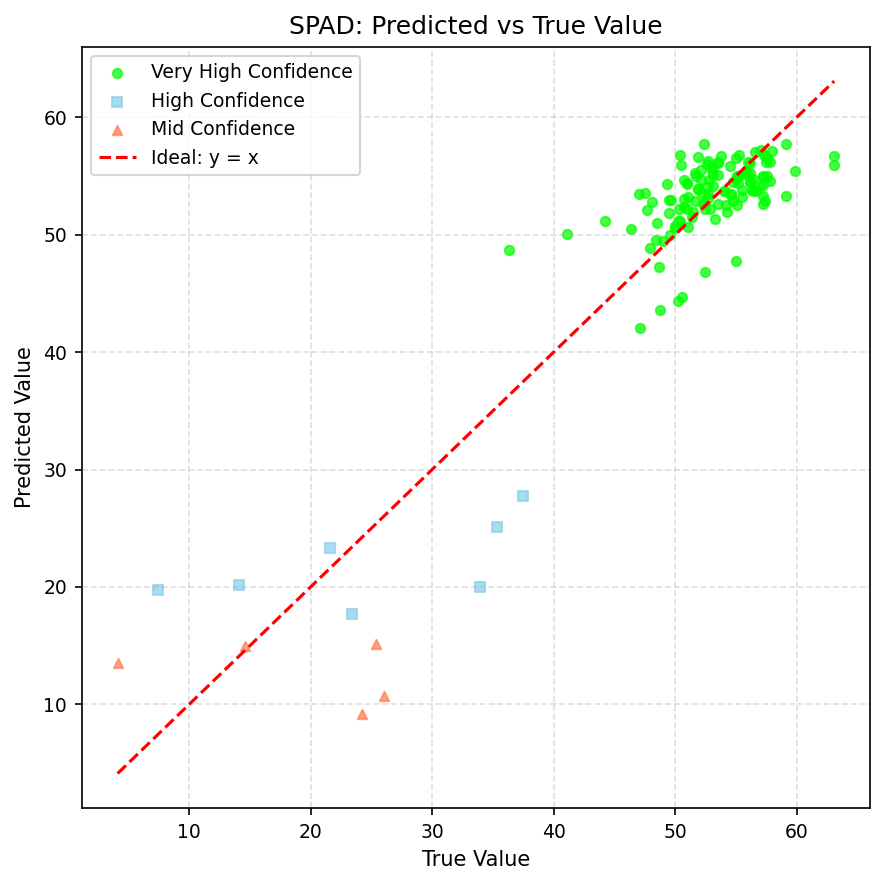

modelPath:  ./allModel/avgEarSize_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  avgEarSize
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  avgEarSize
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.59s/it]



Test Results:
R² Score : -1.5733
MAE      : 0.7811
RMSE     : 0.9165


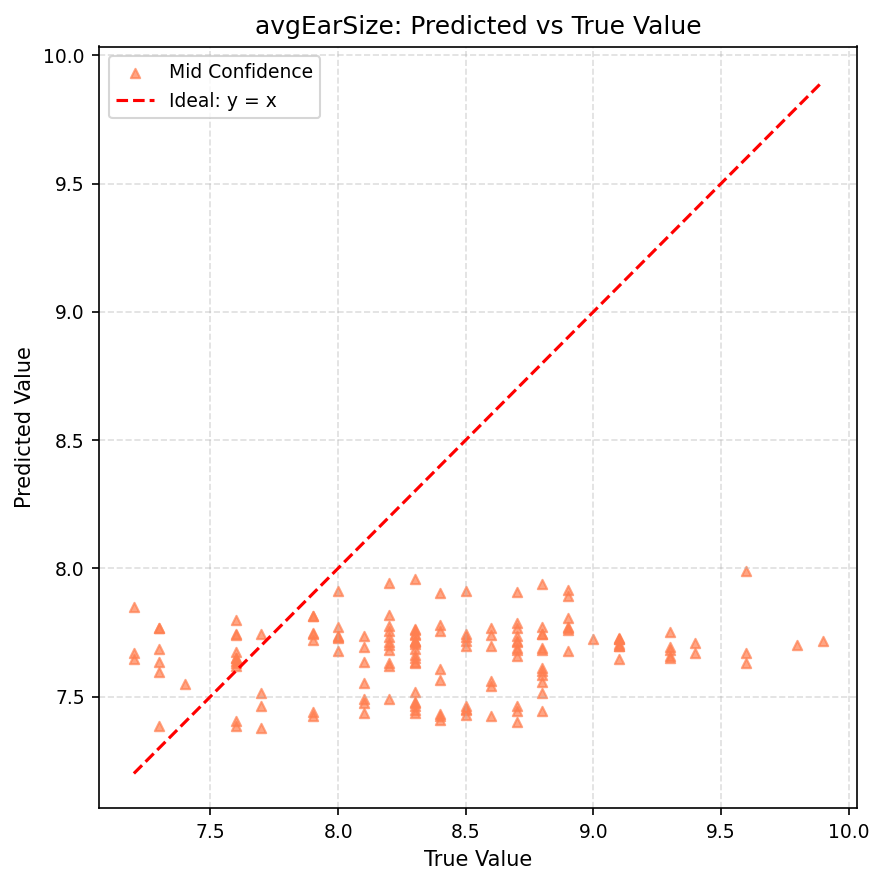

modelPath:  ./allModel/avgEarSize_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  avgEarSize
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  avgEarSize
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:28<00:00,  2.80s/it]



Test Results:
R² Score : -0.7003
MAE      : 0.6063
RMSE     : 0.7450


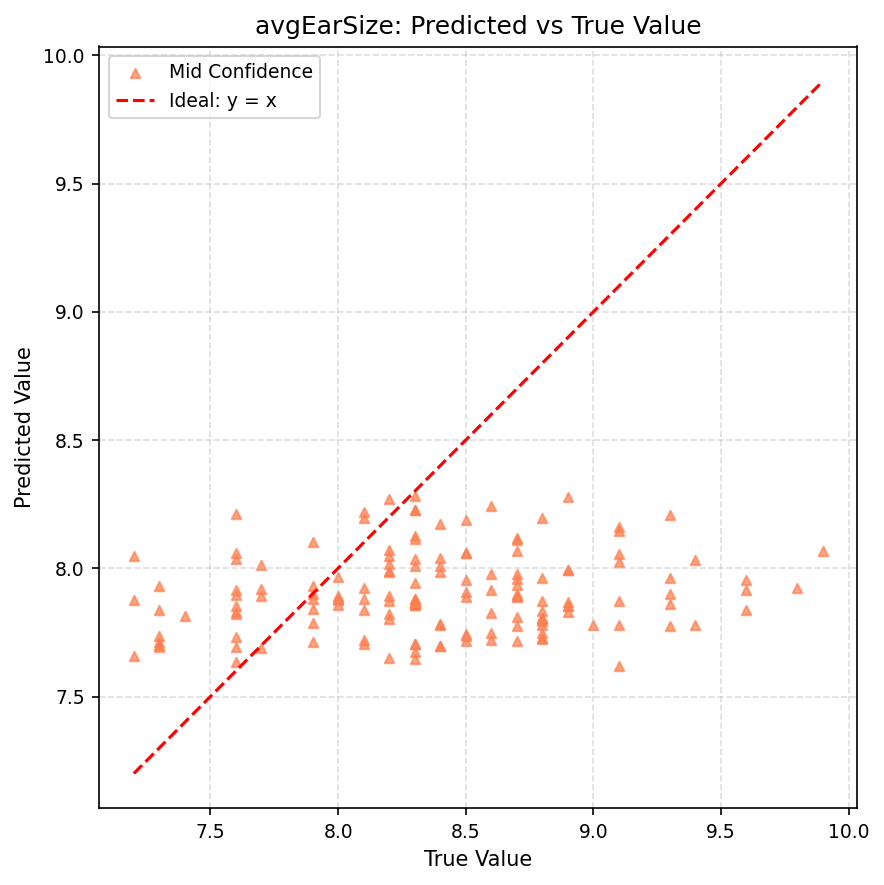

modelPath:  ./allModel/days_DenseNet121WheatModel_from3.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateFrom3.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 24768, Val: 2892, Test: 225
Train Batches: 1548, Validation Batches: 181, Test Batches: 15
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  days
model:  DenseNet121WheatModel


Testing: 100%|██████████| 15/15 [00:38<00:00,  2.59s/it]



Test Results:
R² Score : 0.9953
MAE      : 1.6054
RMSE     : 2.0348


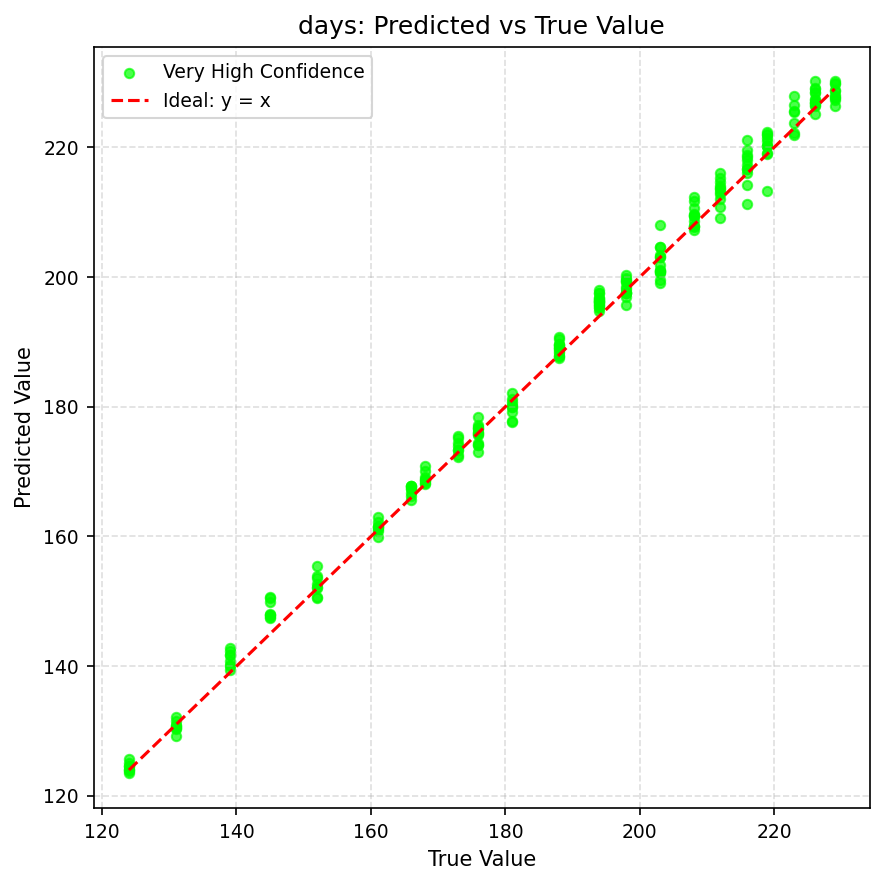

modelPath:  ./allModel/days_DenseNet121WheatModel_from4.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateFrom4.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 20112, Val: 2412, Test: 193
Train Batches: 1257, Validation Batches: 151, Test Batches: 13
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  days
model:  DenseNet121WheatModel


Testing: 100%|██████████| 13/13 [00:26<00:00,  2.01s/it]



Test Results:
R² Score : 0.9891
MAE      : 1.8855
RMSE     : 2.3076


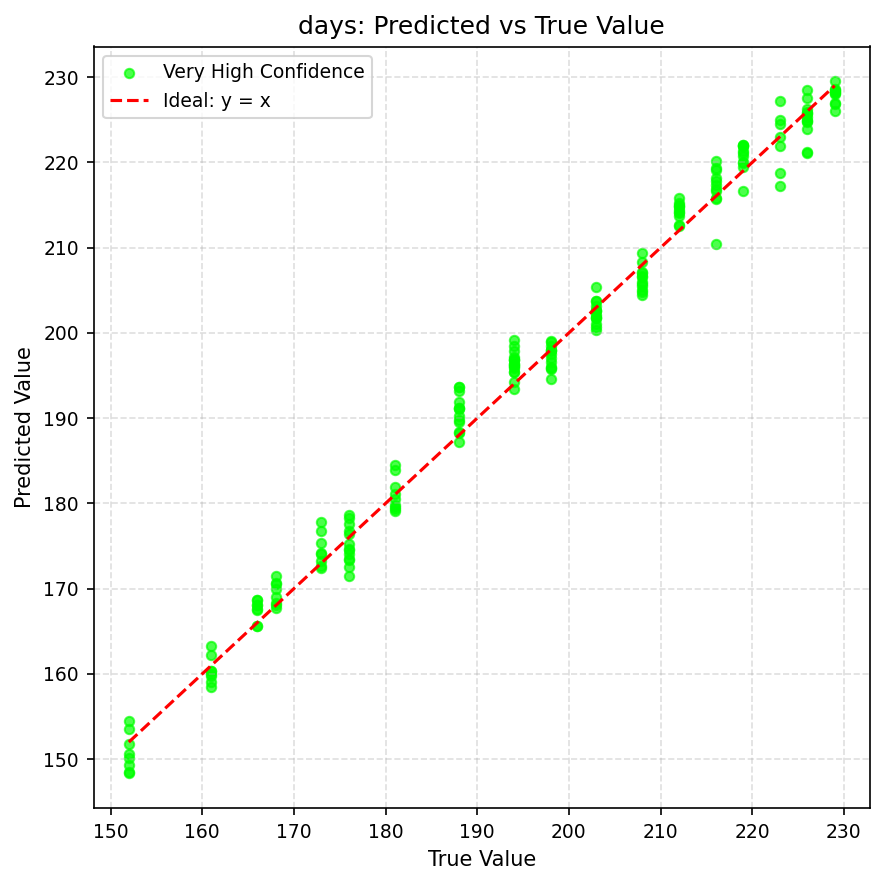

modelPath:  ./allModel/days_DenseNet121WheatModel_noERR.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateAll.csv
modelTarget:  days
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 31752, Val: 3612, Test: 273
Train Batches: 1985, Validation Batches: 226, Test Batches: 18
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  days
model:  DenseNet121WheatModel


Testing: 100%|██████████| 18/18 [00:27<00:00,  1.51s/it]



Test Results:
R² Score : 0.9985
MAE      : 1.3308
RMSE     : 1.7256


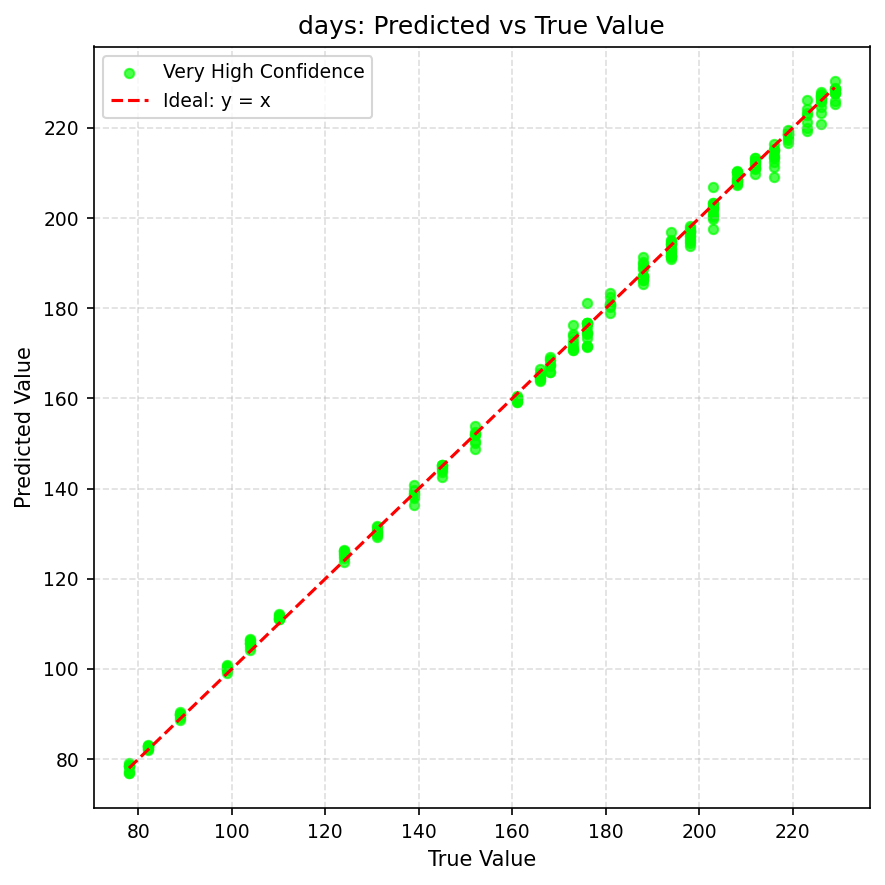

modelPath:  ./allModel/days_RegNetY8GFModel_from3.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateFrom3.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 24768, Val: 2892, Test: 225
Train Batches: 1548, Validation Batches: 181, Test Batches: 15
Using device: mps
traitName:  days
model:  RegNetY8GFModel


Testing: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]



Test Results:
R² Score : 0.9928
MAE      : 2.0875
RMSE     : 2.5248


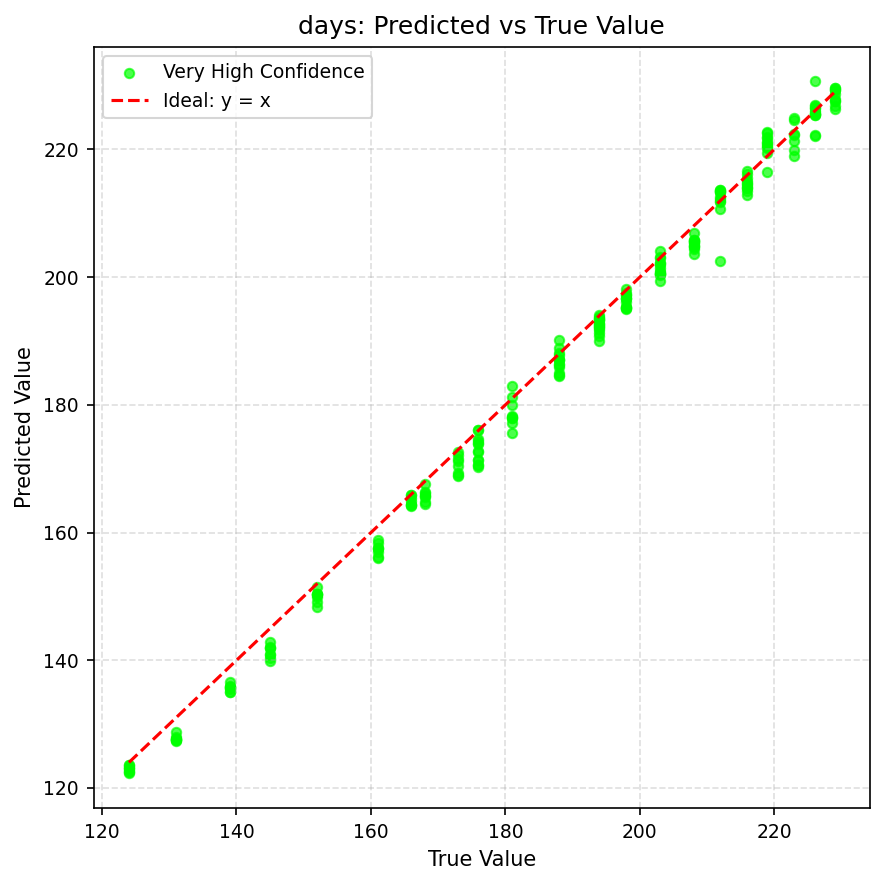

modelPath:  ./allModel/days_RegNetY8GFModel_from4.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateFrom4.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 20112, Val: 2412, Test: 193
Train Batches: 1257, Validation Batches: 151, Test Batches: 13
Using device: mps
traitName:  days
model:  RegNetY8GFModel


Testing: 100%|██████████| 13/13 [00:28<00:00,  2.17s/it]



Test Results:
R² Score : 0.9940
MAE      : 1.3209
RMSE     : 1.7167


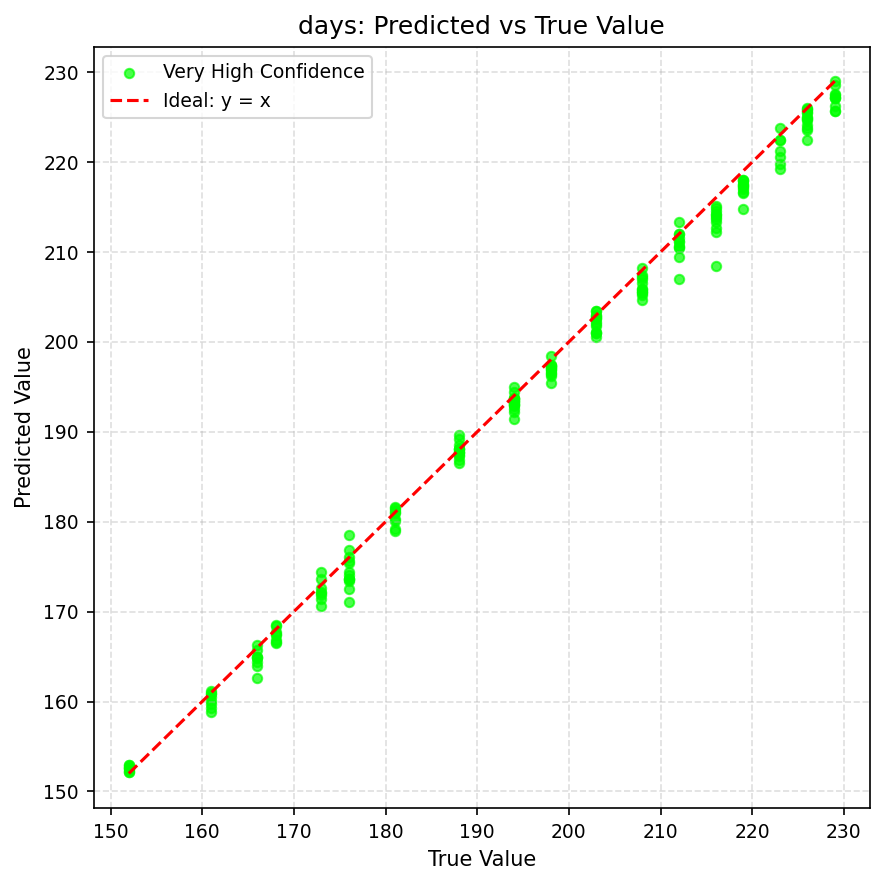

modelPath:  ./allModel/days_RegNetY8GFModel_noERR.pth
dataPath:  ./allTestLabel/dayData_raw1_augment6_noErrDateAll.csv
modelTarget:  days
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 31752, Val: 3612, Test: 273
Train Batches: 1985, Validation Batches: 226, Test Batches: 18
Using device: mps
traitName:  days
model:  RegNetY8GFModel


Testing: 100%|██████████| 18/18 [00:30<00:00,  1.68s/it]



Test Results:
R² Score : 0.9977
MAE      : 1.6946
RMSE     : 2.1491


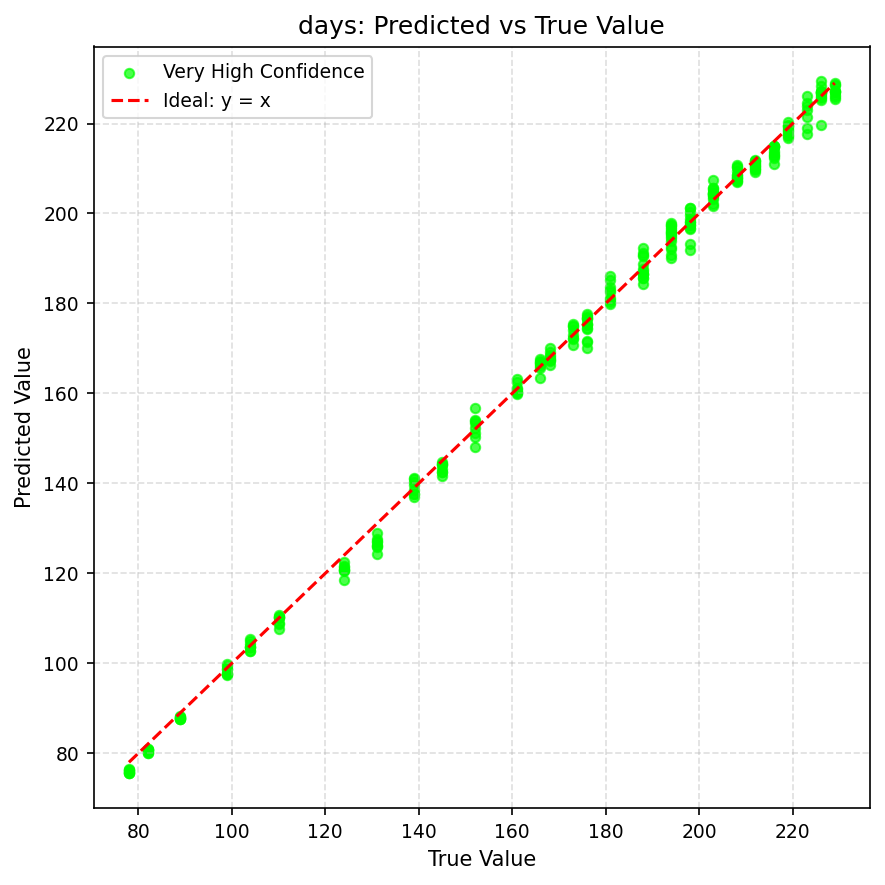

modelPath:  ./allModel/leafLength_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  leafLength
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  leafLength
model:  DenseNet121WheatModel


Testing: 100%|██████████| 9/9 [00:25<00:00,  2.87s/it]



Test Results:
R² Score : 0.0929
MAE      : 1.8974
RMSE     : 2.5486


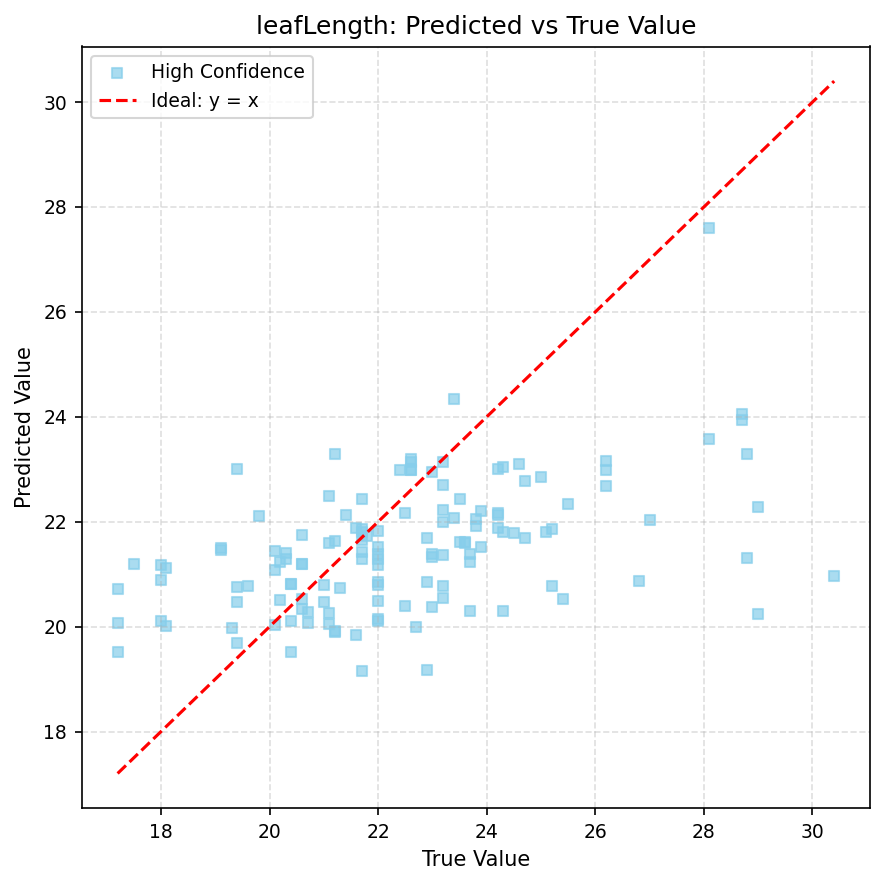

modelPath:  ./allModel/leafLength_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  leafLength
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  leafLength
model:  RegNetY8GFModel


Testing: 100%|██████████| 9/9 [00:27<00:00,  3.07s/it]



Test Results:
R² Score : 0.0969
MAE      : 1.9690
RMSE     : 2.5430


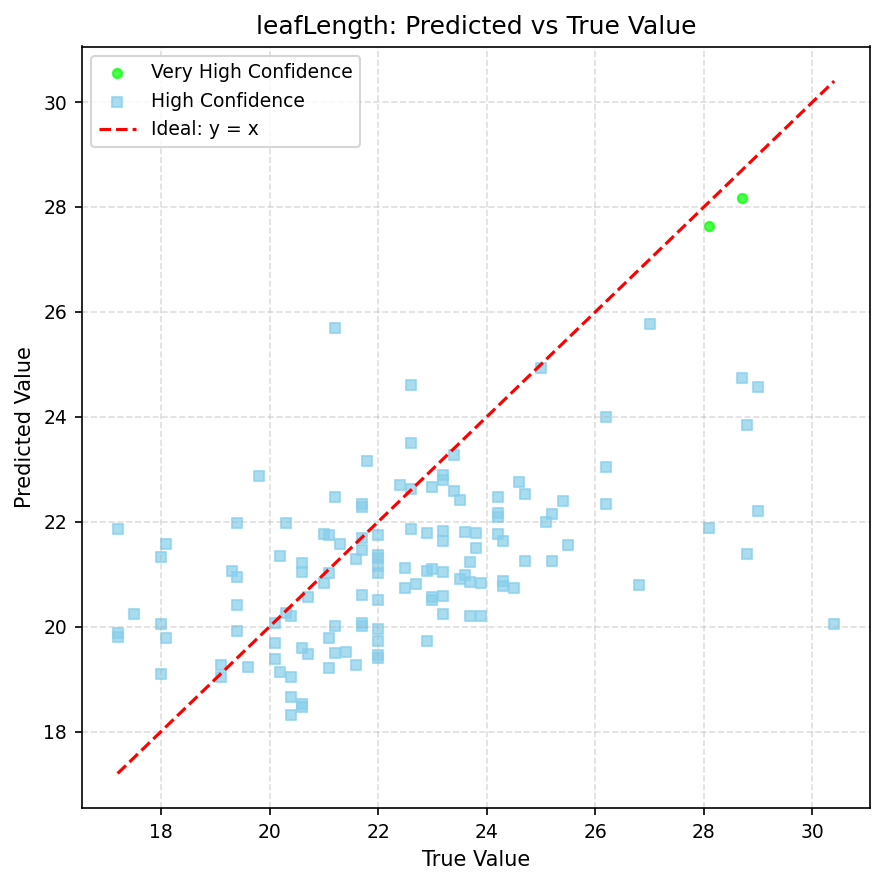

modelPath:  ./allModel/leafWidth_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  leafWidth
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  leafWidth
model:  DenseNet121WheatModel


Testing: 100%|██████████| 9/9 [00:25<00:00,  2.85s/it]



Test Results:
R² Score : -5.5924
MAE      : 0.3726
RMSE     : 0.3970


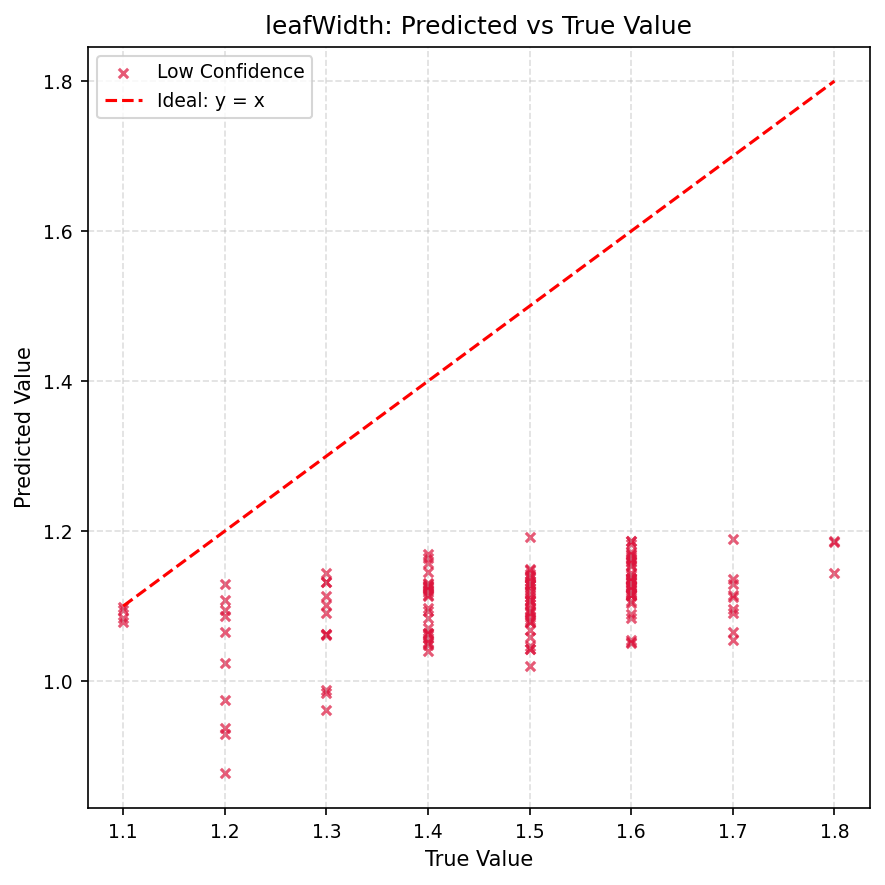

modelPath:  ./allModel/leafWidth_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allWeeklyData_raw1_day13.csv
modelTarget:  leafWidth
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 21420, Val: 2680, Test: 134
Train Batches: 1339, Validation Batches: 168, Test Batches: 9
Using device: mps
traitName:  leafWidth
model:  RegNetY8GFModel


Testing: 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]



Test Results:
R² Score : -6.2178
MAE      : 0.3931
RMSE     : 0.4154


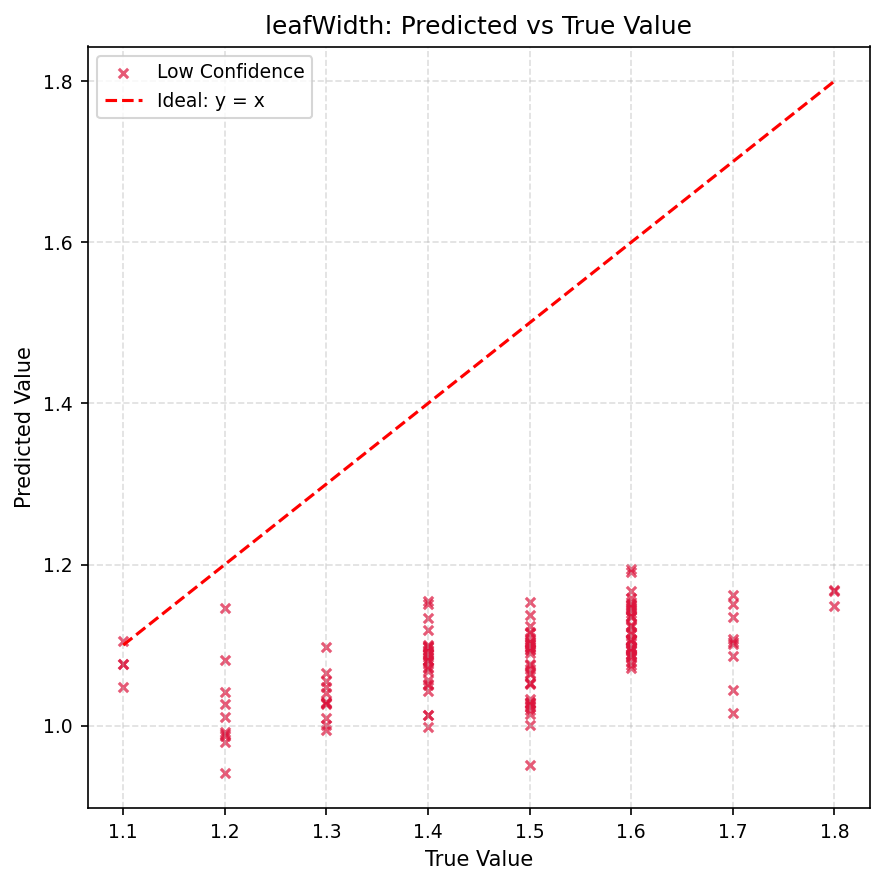

modelPath:  ./allModel/totEarNum_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totEarNum
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  totEarNum
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.57s/it]



Test Results:
R² Score : 0.7953
MAE      : 35.4504
RMSE     : 45.2119


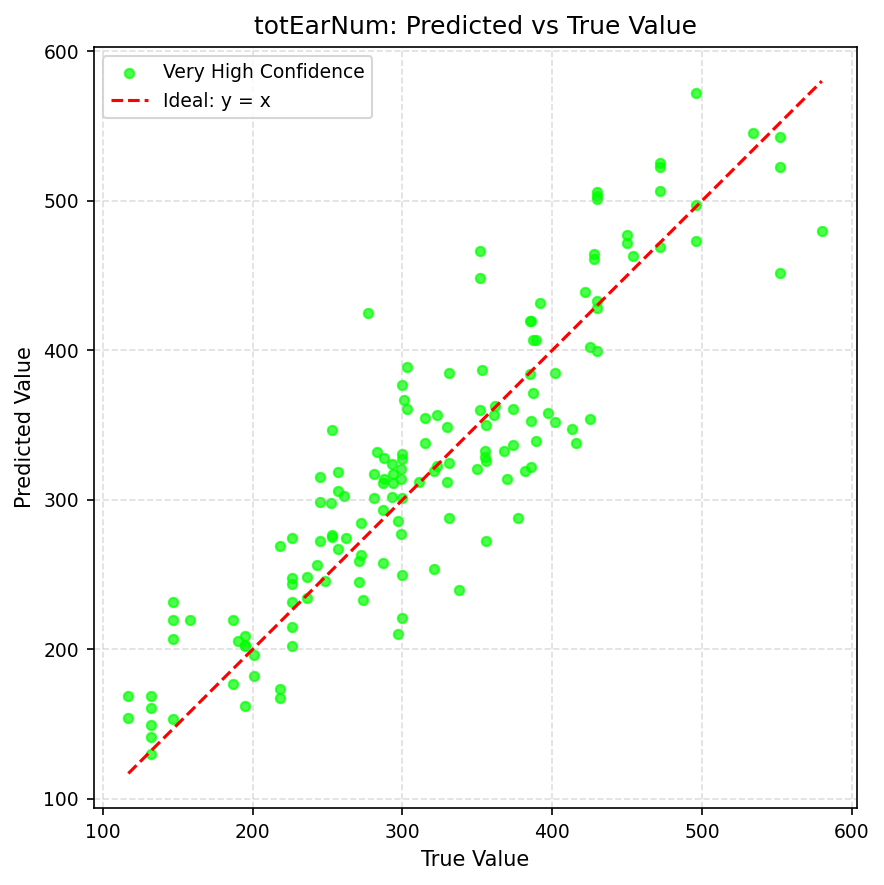

modelPath:  ./allModel/totEarNum_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totEarNum
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  totEarNum
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:27<00:00,  2.80s/it]



Test Results:
R² Score : 0.7915
MAE      : 35.9055
RMSE     : 45.6295


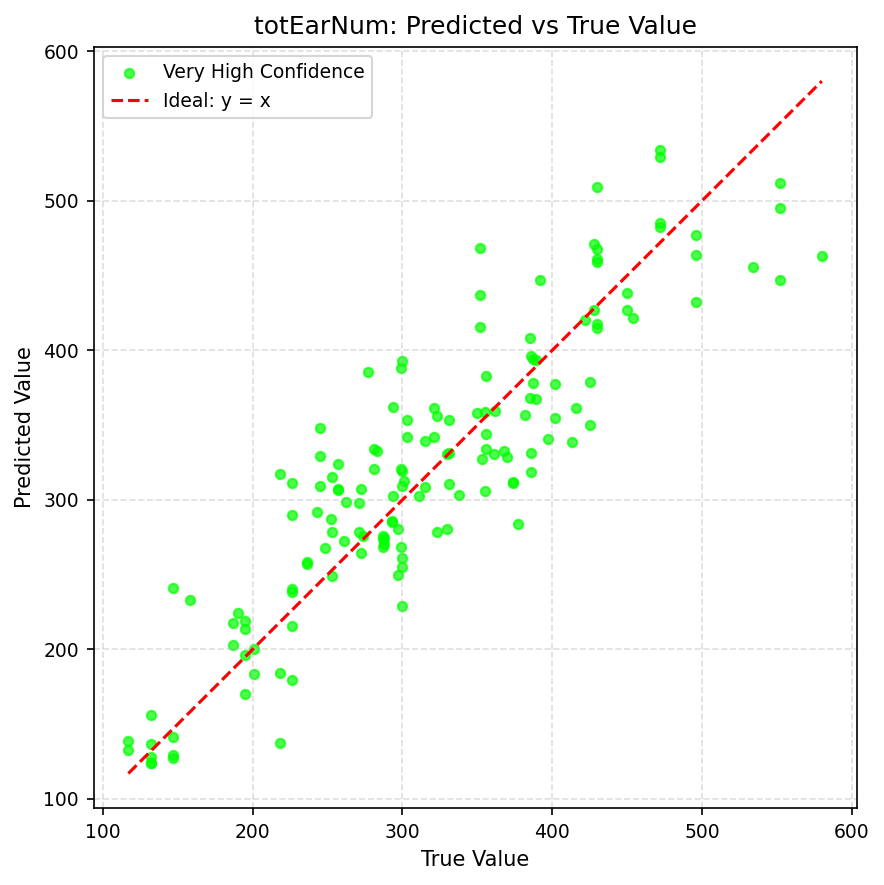

modelPath:  ./allModel/totEarWeight_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totEarWeight
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  totEarWeight
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.58s/it]



Test Results:
R² Score : 0.9007
MAE      : 91.3353
RMSE     : 131.5658


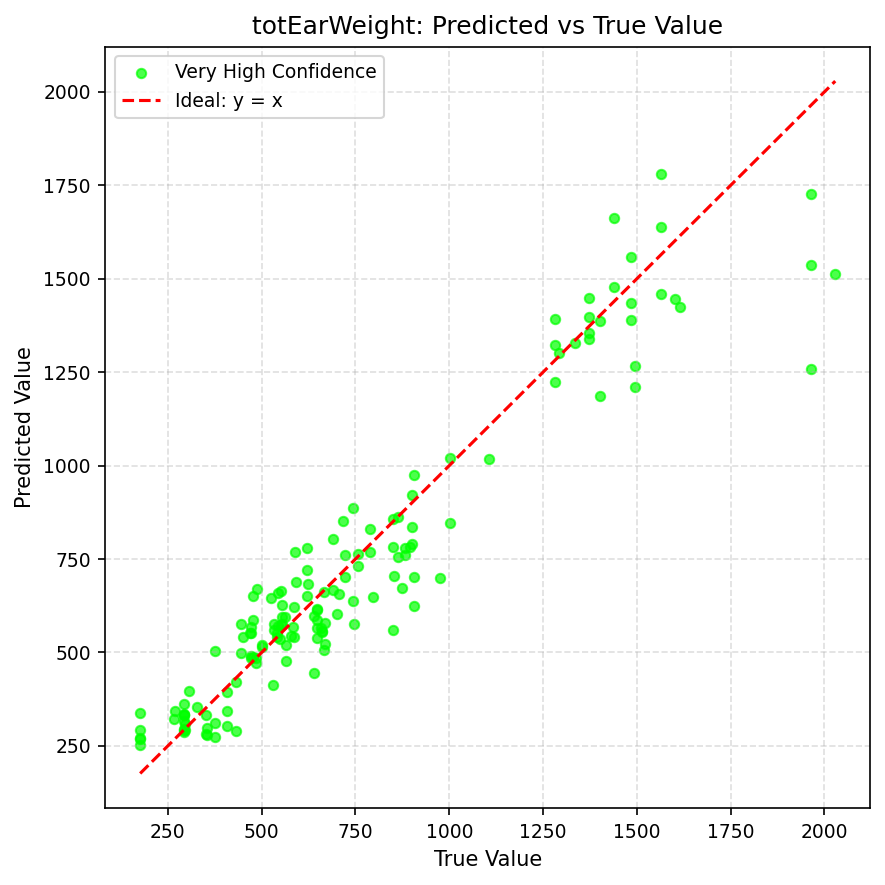

modelPath:  ./allModel/totEarWeight_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totEarWeight
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  totEarWeight
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:28<00:00,  2.83s/it]



Test Results:
R² Score : 0.9190
MAE      : 90.8984
RMSE     : 118.8563


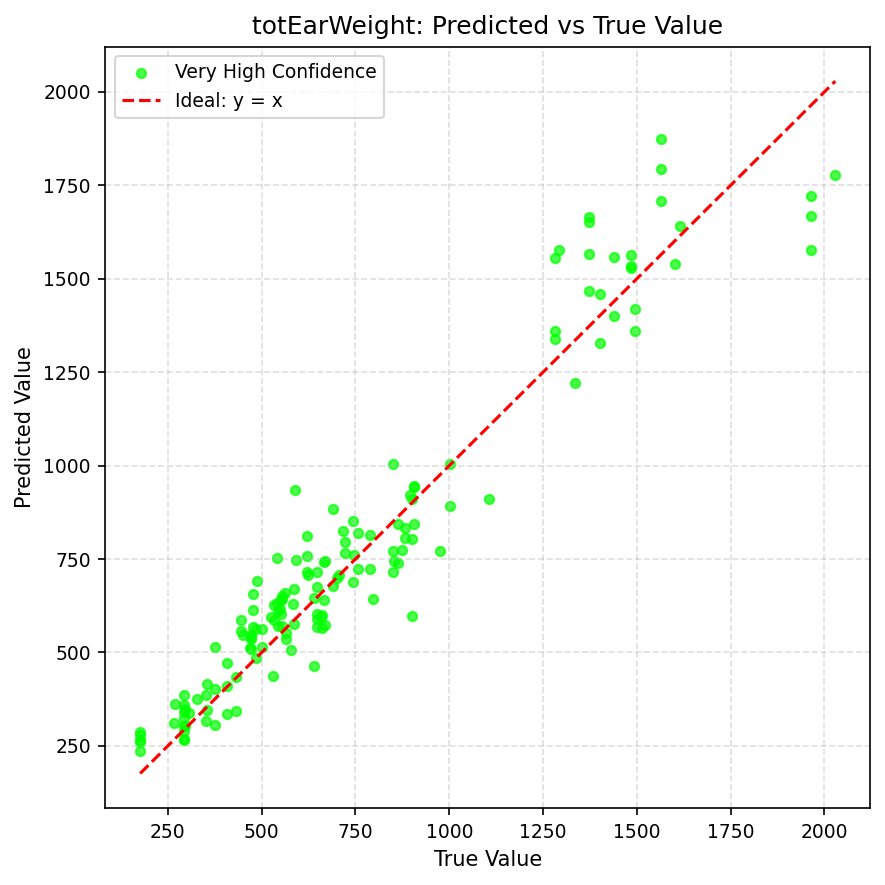

modelPath:  ./allModel/totalSeedNum_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedNum
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  totalSeedNum
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.55s/it]



Test Results:
R² Score : 0.7557
MAE      : 698.0412
RMSE     : 936.8583


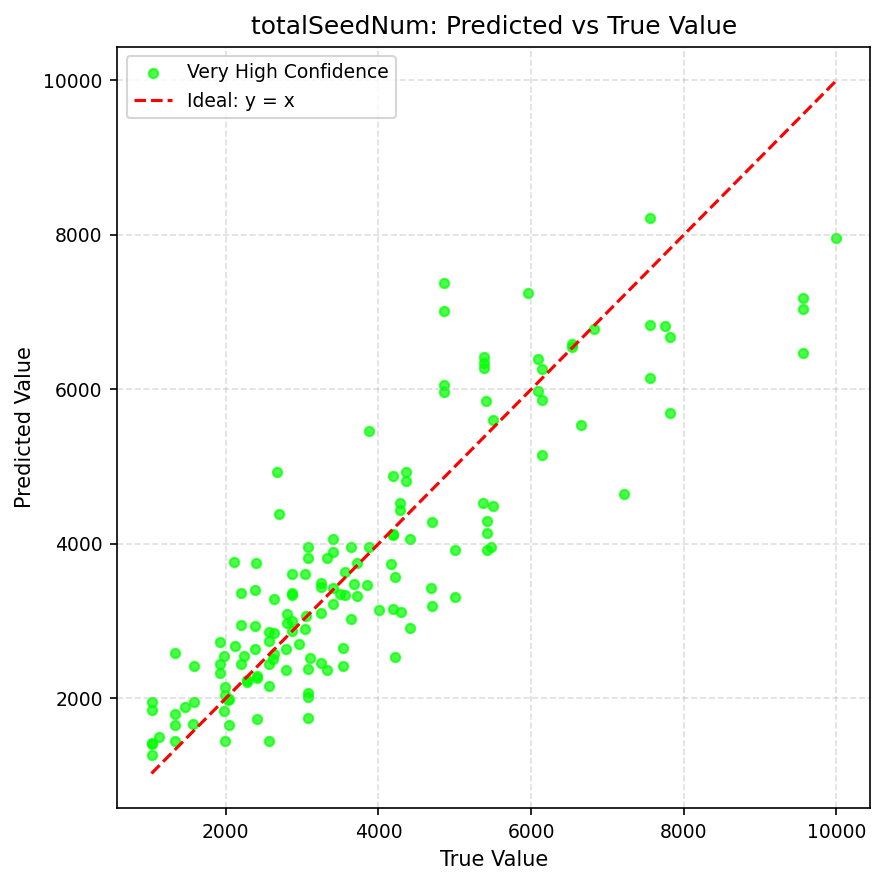

modelPath:  ./allModel/totalSeedNum_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedNum
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  totalSeedNum
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:27<00:00,  2.80s/it]



Test Results:
R² Score : 0.7173
MAE      : 793.8994
RMSE     : 1007.7858


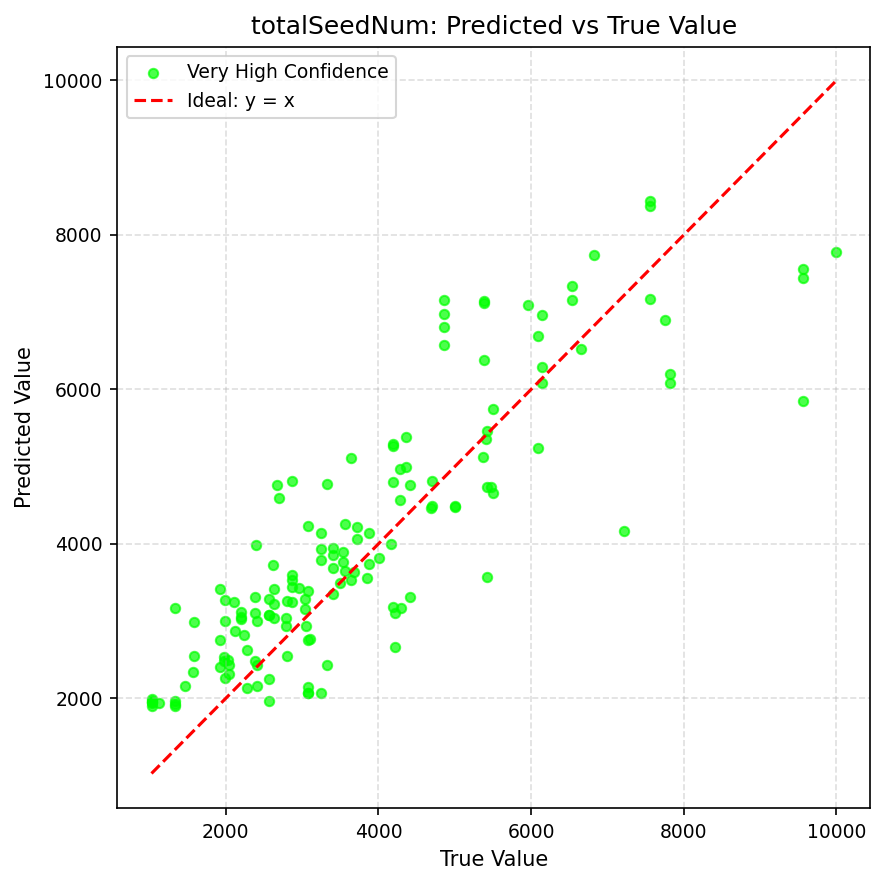

modelPath:  ./allModel/totalSeedWeightAfterDry_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedWeightAfterDry
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  totalSeedWeightAfterDry
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.57s/it]



Test Results:
R² Score : 0.7305
MAE      : 28.8178
RMSE     : 38.1802


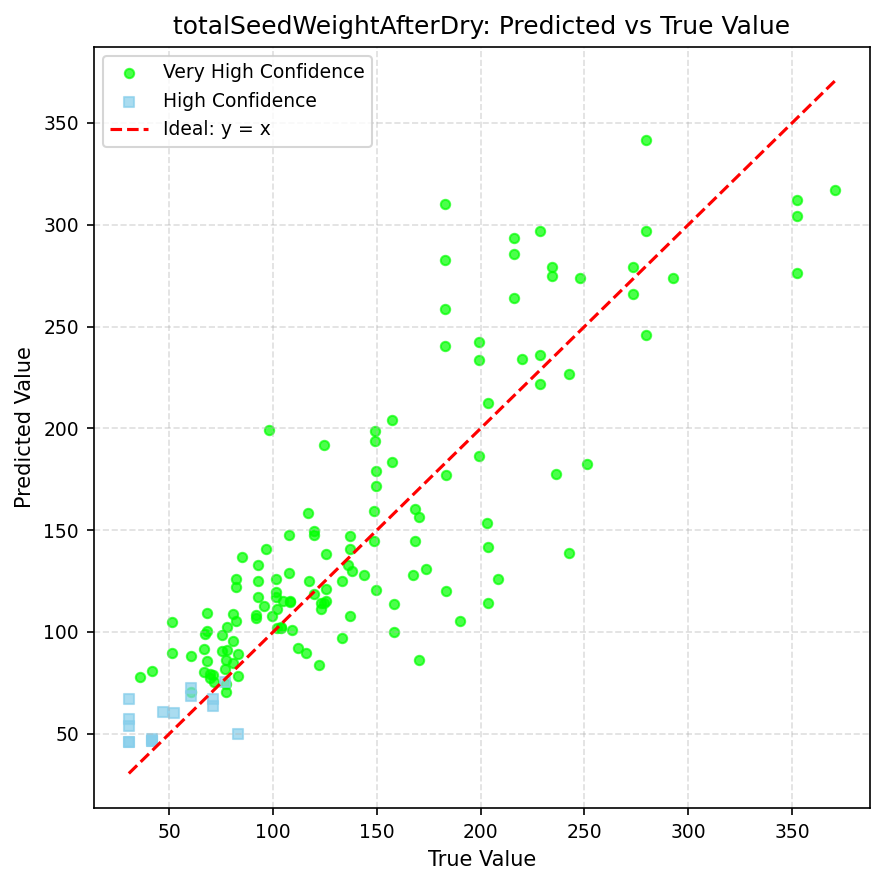

modelPath:  ./allModel/totalSeedWeightAfterDry_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedWeightAfterDry
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  totalSeedWeightAfterDry
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:27<00:00,  2.77s/it]



Test Results:
R² Score : 0.7982
MAE      : 23.7939
RMSE     : 33.0366


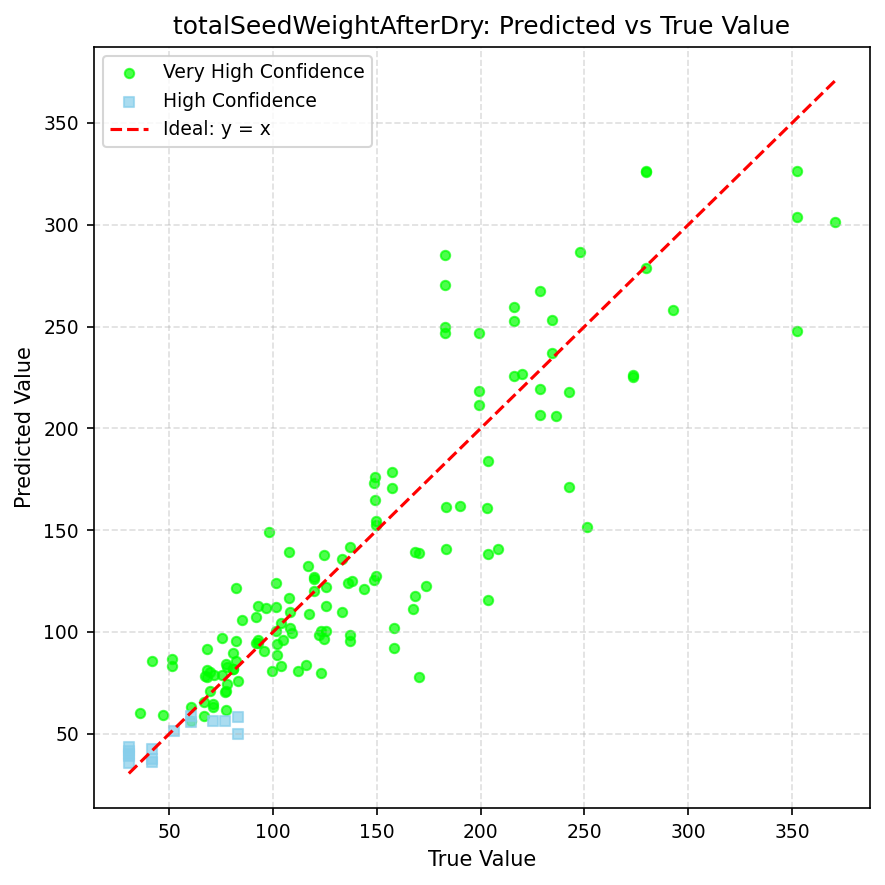

modelPath:  ./allModel/totalSeedWeightBeforeDry_DenseNet121WheatModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedWeightBeforeDry
modelBackbone:  DenseNet121WheatModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps


/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ice/.pyenv/versions/3.10.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


traitName:  totalSeedWeightBeforeDry
model:  DenseNet121WheatModel


Testing: 100%|██████████| 10/10 [00:25<00:00,  2.58s/it]



Test Results:
R² Score : 0.7252
MAE      : 30.4995
RMSE     : 42.7150


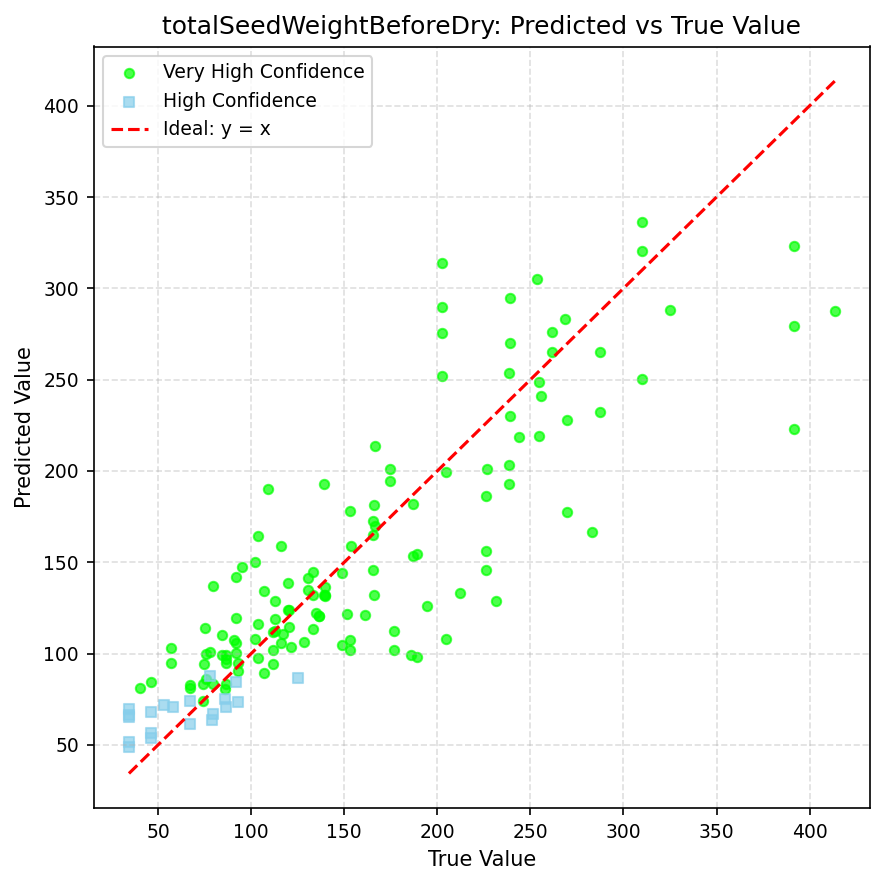

modelPath:  ./allModel/totalSeedWeightBeforeDry_RegNetY8GFModel_raw1.pth
dataPath:  ./allTestLabel/allResultData_raw1_day13.csv
modelTarget:  totalSeedWeightBeforeDry
modelBackbone:  RegNetY8GFModel
✅ Safe Split → Train: 23920, Val: 2980, Test: 150
Train Batches: 1495, Validation Batches: 187, Test Batches: 10
Using device: mps
traitName:  totalSeedWeightBeforeDry
model:  RegNetY8GFModel


Testing: 100%|██████████| 10/10 [00:28<00:00,  2.81s/it]



Test Results:
R² Score : 0.8115
MAE      : 25.3676
RMSE     : 35.3782


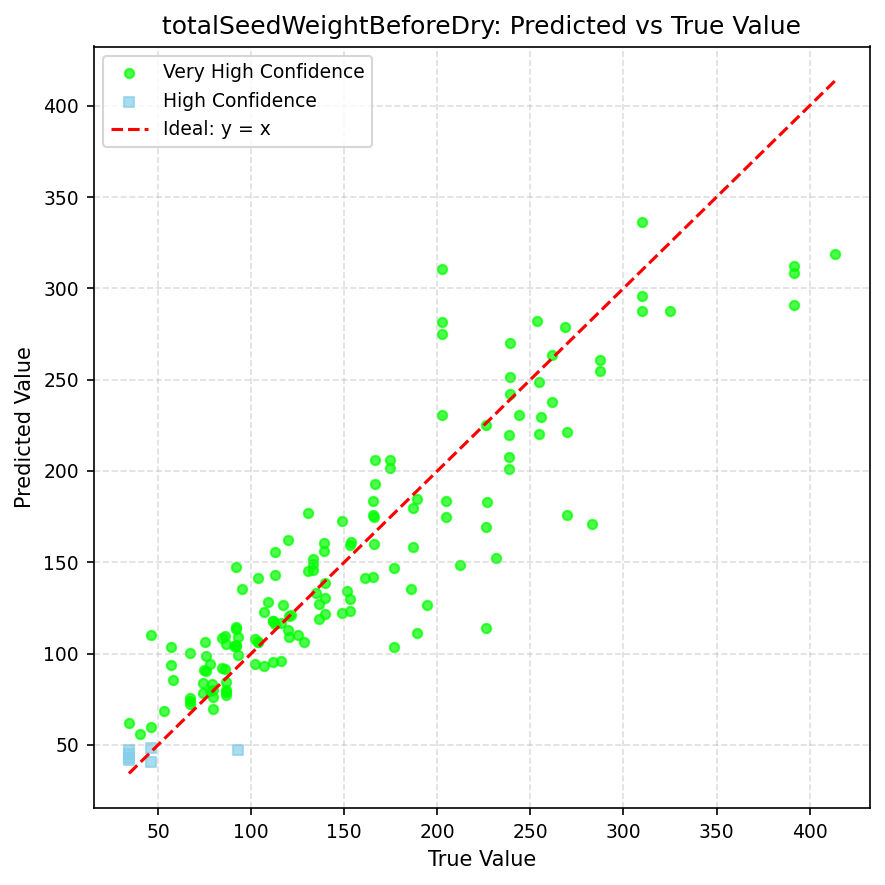

In [3]:
def checkIfWeeklyData(target, extraInpList):
    weeklyData = ["Height", "LAI", "SPAD", "leafWidth", "leafLength"]
    if(target in weeklyData):
        for input in extraInpList:
            if(input in weeklyData):
                return True
        return True
    return False

def checkIfResultData(target):
    resultData =['totEarWeight','totEarNum','avgEarSize',
                 '20StrawWeightBeforeDry','20StrawWeightAfterDry',
                 'totalSeedNum','totalSeedWeightBeforeDry','totalSeedWeightAfterDry']
    if(target in resultData):
        return True
    return False

def checkIfhassExtra(name):
    extraInpList = []
    for compo in name.split("_"):
        if(compo[:5] == "extra"):
            extraInpList = compo.split("-")[1:]
            if(extraInpList[-1][-4:]== ".pth"):
                extraInpList[-1] = extraInpList[-1][:-4]

    return extraInpList

def checkIfRaw1Data(name):
    if(name.split("_")[-1].split(".")[0] == "raw1"):
        return True
    return False

modelFilePath = "./allModel/"

bb = []
for fullModelName in sorted(os.listdir(modelFilePath)):
    isExtra = False
    modelPath = modelFilePath + fullModelName
    modelTarget = fullModelName.split("_")[0]
    modelBackbone = fullModelName.split("_")[1].split('.')[0]

    if(modelTarget == "days"):
        dayData = fullModelName.split("_")[-1].split(".")[0]
        if( dayData == "noERR" ):
            datafile = "dayData_raw1_augment6_noErrDateAll.csv"
        elif( dayData == "from3" ):
            datafile = "dayData_raw1_augment6_noErrDateFrom3.csv"
        elif( dayData == "from4" ):
            datafile = "dayData_raw1_augment6_noErrDateFrom4.csv"
        dataPath = "./allTestLabel/" + datafile

        print("modelPath: ", modelPath)
        print("dataPath: ", dataPath)
        print("modelTarget: ", modelTarget)
        print("modelBackbone: ", modelBackbone)
        setAndTestPlotModel(dataPath, modelTarget, modelDict[modelBackbone], modelPath)
        continue

    extraInpList = checkIfhassExtra(fullModelName)
    isWeeklyData = checkIfWeeklyData(modelTarget, extraInpList)
    isRaw1Data = checkIfRaw1Data(fullModelName)

    if(isWeeklyData and isRaw1Data):
        datafile = "allWeeklyData_raw1_day13.csv"
    elif(isWeeklyData and not isRaw1Data):
        datafile = "allWeeklyData_raw3_day13.csv"
    elif(not isWeeklyData and isRaw1Data):
        datafile = "allResultData_raw1_day13.csv"
    else:
        datafile = "allResultData_raw3_day13.csv"
    dataPath = "./allTestLabel/" + datafile

    print("modelPath: ", modelPath)
    print("dataPath: ", dataPath)
    print("modelTarget: ", modelTarget)
    print("modelBackbone: ", modelBackbone)
    if(extraInpList!=[]):
        print("extraInput: ", extraInpList)
        setAndTestPlotModel_with_extra_input(dataPath, modelTarget, modelDict[modelBackbone], modelPath, extraInpList)
    else:
        setAndTestPlotModel(dataPath, modelTarget, modelDict[modelBackbone], modelPath)

In [4]:
# setAndTestModelByDate("./allTestLabel/allResultData_raw3_day13.csv", "totEarNum", RepVGGA1WheatModelWithConfidence, "./allModel/totEarNum_RepVGGA1WheatModelWithConfidence.pth")
# setAndTestModelByDate("./allTestLabel/allWeeklyData_raw3_day13.csv", "totEarWeight", RegNetY8GFModel, "./allModel/totEarWeight_RegNetY8GFModel.pth")
# setAndTestModelByDate("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedNum", RegNetY8GFModel, "./allModel/totalSeedNum_RegNetY8GFModel_raw1.pth")
# setAndTestModelByDate("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedWeightBeforeDry", EfficientNetV2MWheatModelWithConfidence, "./allModel/totalSeedWeightBeforeDry_EfficientNetV2MWheatModelWithConfidence_raw1.pth")


In [5]:
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totEarWeight", RegNetY8GFModel, "./allModel/totEarWeight_RegNetY8GFModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allWeeklyData_raw3_day13.csv", "totEarWeight", RegNetY8GFModel, "./allModel/totEarWeight_RegNetY8GFModel.pth")
# setAndTestPlotModel("./allTestLabel/allWeeklyData_raw3_day13.csv", "totEarWeight", RepVGGA1WheatModelWithConfidence, "./allModel/totEarWeight_RepVGGA1WheatModelWithConfidence.pth")
# setAndTestPlotModel("./allTestLabel/allWeeklyData_raw3_day13.csv", "totEarWeight", RepVGGB1g4Model, "./allModel/totEarWeight_RepVGGB1g4Model.pth")
# setAndTestPlotModel_with_extra_input("./allTestLabel/allWeeklyData_raw3_day13.csv", "LAI", DenseNetConfidenceAdd2Inputs, "./allModel/LAI_DenseNetConfidenceAdd2Inputs_extraInput-totEarWeight-time.pth",  ['totEarWeight', 'time'])
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedNum", DenseNet121WheatModel, "./allModel/totalSeedNum_DenseNet121WheatModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedNum", RegNetY8GFModel, "./allModel/totalSeedNum_RegNetY8GFModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedWeightAfterDry", DenseNet121WheatModel, "./allModel/totalSeedWeightAfterDry_DenseNet121WheatModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedWeightAfterDry", RegNetY8GFModel, "./allModel/totalSeedWeightAfterDry_RegNetY8GFModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedWeightBeforeDry", DenseNet121WheatModel, "./allModel/totalSeedWeightBeforeDry_DenseNet121WheatModel_raw1.pth")
# setAndTestPlotModel("./allTestLabel/allResultData_raw1_day13.csv", "totalSeedWeightBeforeDry", EfficientNetV2MWheatModelWithConfidence, "./allModel/totalSeedWeightBeforeDry_EfficientNetV2MWheatModelWithConfidence_raw1.pth")